# Segmentação de clientes

**Problema de négocio:** A empresa de hipermercados "Santa Teresa", que é uma empresa que vende dos mais diversos itens, além de um supermercado normal você pode comprar até ouro, deseja segmentar seus clientes e entender seus hábitos, para dessa forma aumentar as vendas, conquistar novos clientes e não perder os atuais. Foi disponibilizado pela empresa um dataset sobre 2240 clientes e algumas de suas características, cabe a nós cientistas de dados, analisar, entender e aplicar ferramentas sobre esses dados afim de gerar informações úteis e agregar ao negócio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from datetime import date

import warnings
warnings.filterwarnings("ignore")

## Conhecendo os dados

**Obs:** Não irei traduzir o nome das colunas no dataset nem suas descrições, para poupar tempo e recursos.

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Attributes

#### People

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if customer complained in the last 2 years, 0 otherwise
    
#### Products

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years
    
#### Promotion

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
    
#### Place

    NumWebPurchases: Number of purchases made through the company’s web site
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s web site in the last month

## Preparação dos dados

**Preenchendo valores nulos**

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df["Income"].fillna(df["Income"].mean(), inplace = True)

In [7]:
df.isnull().sum().sum()

0

#### Removendo alguns outliers

In [8]:
df = df[df['Income']<600000]

#### Mudando o tipo da data para data

In [9]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

**Engenharia de variáveis**

In [10]:
df["Age"] = 2014 - df["Year_Birth"]

df["Education"] = df["Education"].replace({"Graduation": "Graduated", "PhD":"Graduated", \
                                           "Master": "Graduated", "Basic": "Undergraduated",\
                                           "2n Cycle": "Undergraduated"})

df["Marital_Status"] = df["Marital_Status"].replace({"Single": "Single", "Together": "Engaged", \
                                                     "Married":"Engaged", "Divorced":"Single", \
                                                     "Widow":"Single", "Alone": "Single", \
                                                     "Absurd": "Single", "YOLO":"Single"})

df["Kids"] = df["Kidhome"] + df["Teenhome"]

df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [11]:
df["Dt_Customer"].max()

Timestamp('2014-12-06 00:00:00')

In [12]:
latest_date = date(2014, 12, 6)

In [13]:
df["housetime"] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, format = '%Y-%m-%d')
df["housetime"] = pd.to_numeric(df['housetime'].dt.date.apply(lambda x: (latest_date - x)).dt.days, downcast='integer')

In [14]:
df["Age_group"] = pd.cut(df['Age'], bins=[0, 30, 60, 125], labels=["Young", "Mature", "Old"])
df["Income_group"] = pd.qcut(df['Income'], q=3, labels= ["Low income", "Medium income", "High income"])
df["housetime_group"] = pd.qcut(df['housetime'], q=3, labels = ["New customer", "Experienced customer", "Old customer"])
df["spent_group"] = pd.qcut(df['Spent'], q=3, labels = ["low", "medium", "high"])

#### Removendo as colunas que não iremos usar

In [15]:
useless_col = ["ID", "Year_Birth", "Dt_Customer", "AcceptedCmp1", "AcceptedCmp2", \
               "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Z_CostContact", \
               "Z_Revenue", "Response"]

df.drop(useless_col, axis = 1, inplace = True)

#### Simplificando o nome das colunas

In [16]:
df = df.rename(columns = {"MntWines": "Wine", "MntFruits": "Fruits", "MntMeatProducts": "Meat", "MntFishProducts": "Fish", "MntSweetProducts": "Sweets", "MntGoldProds":"Gold", "NumDealsPurchases": "Deals", "NumWebPurchases": "Web", "NumCatalogPurchases": "Catalog", "NumStorePurchases":"Store", "NumWebVisitsMonth": "Web_visits"})

In [17]:
df.columns = df.columns.str.lower()

In [18]:
df.head()

,education,marital_status,income,kidhome,teenhome,recency,wine,fruits,meat,fish,...,web_visits,complain,age,kids,spent,housetime,age_group,income_group,housetime_group,spent_group
0,Graduated,Single,58138.0,0,0,58,635,88,546,172,...,7,0,57,0,1617,971,Mature,Medium income,Old customer,high
1,Graduated,Single,46344.0,1,1,38,11,1,6,2,...,5,0,60,2,27,125,Mature,Medium income,New customer,low
2,Graduated,Engaged,71613.0,0,0,26,426,49,127,111,...,4,0,49,0,776,472,Mature,High income,Experienced customer,medium
3,Graduated,Engaged,26646.0,1,0,26,11,4,20,10,...,6,0,30,1,53,65,Young,Low income,New customer,low
4,Graduated,Engaged,58293.0,1,0,94,173,43,118,46,...,5,0,33,1,422,321,Mature,Medium income,New customer,medium


**Separando as colunas em tipos.**

In [19]:
col_cat = ['education', 'marital_status', 'complain', 'age_group', 'income_group', 'housetime_group', 'spent_group']
col_con = ['income', 'kidhome', 'teenhome', 'recency', 'wine', 'fruits', 'meat', 'fish', 'sweets', \
           'gold', 'deals', 'web', 'catalog', 'store', 'web_visits', 'age', 'kids', 'spent', 'housetime']

**Com todas as variáveis criadas e o dataset ajustado, podemos agora criar sub-datasets com as variáveis que queremos para direcionar o tipo de segmentação que desejamos aplicar.**

## Análise exploratória

Primeiro um olhar geral em como as variáveis se relacionam.

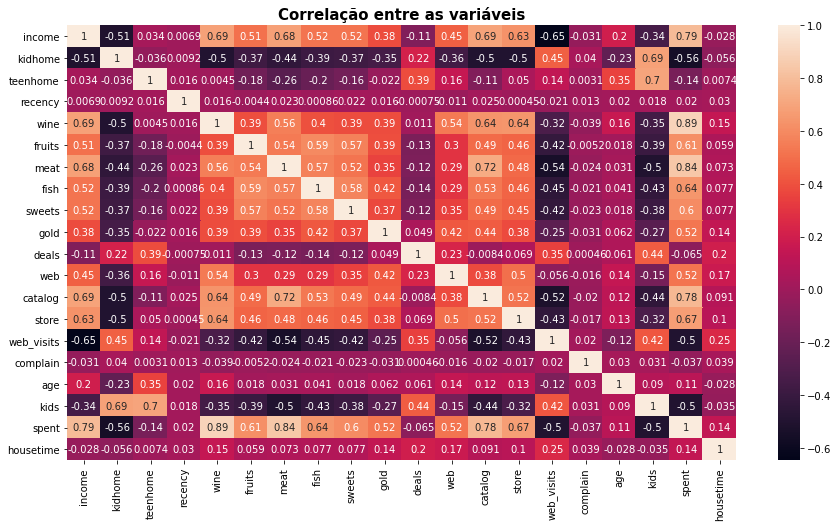

In [20]:
plt.figure(figsize = [15, 8])
sns.heatmap(df.corr(), annot = True)
plt.title("Correlação entre as variáveis", fontsize = 15, fontweight = "bold")
plt.show()

### Análise univariada:

In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
income,2239.0,51972.834762,21410.605416,1730.0,35533.5,51717.0,68277.5,162397.0
kidhome,2239.0,0.443948,0.538390,0.0,0.0,0.0,1.0,2.0
teenhome,2239.0,0.506476,0.544555,0.0,0.0,0.0,1.0,2.0
recency,2239.0,49.121036,28.963662,0.0,24.0,49.0,74.0,99.0
wine,2239.0,304.067441,336.614830,0.0,24.0,174.0,504.5,1493.0
fruits,2239.0,26.307727,39.781468,0.0,1.0,8.0,33.0,199.0
meat,2239.0,167.016525,225.743829,0.0,16.0,67.0,232.0,1725.0
fish,2239.0,37.538633,54.637617,0.0,3.0,12.0,50.0,259.0
sweets,2239.0,27.074587,41.286043,0.0,1.0,8.0,33.0,263.0
gold,2239.0,44.036177,52.174700,0.0,9.0,24.0,56.0,362.0


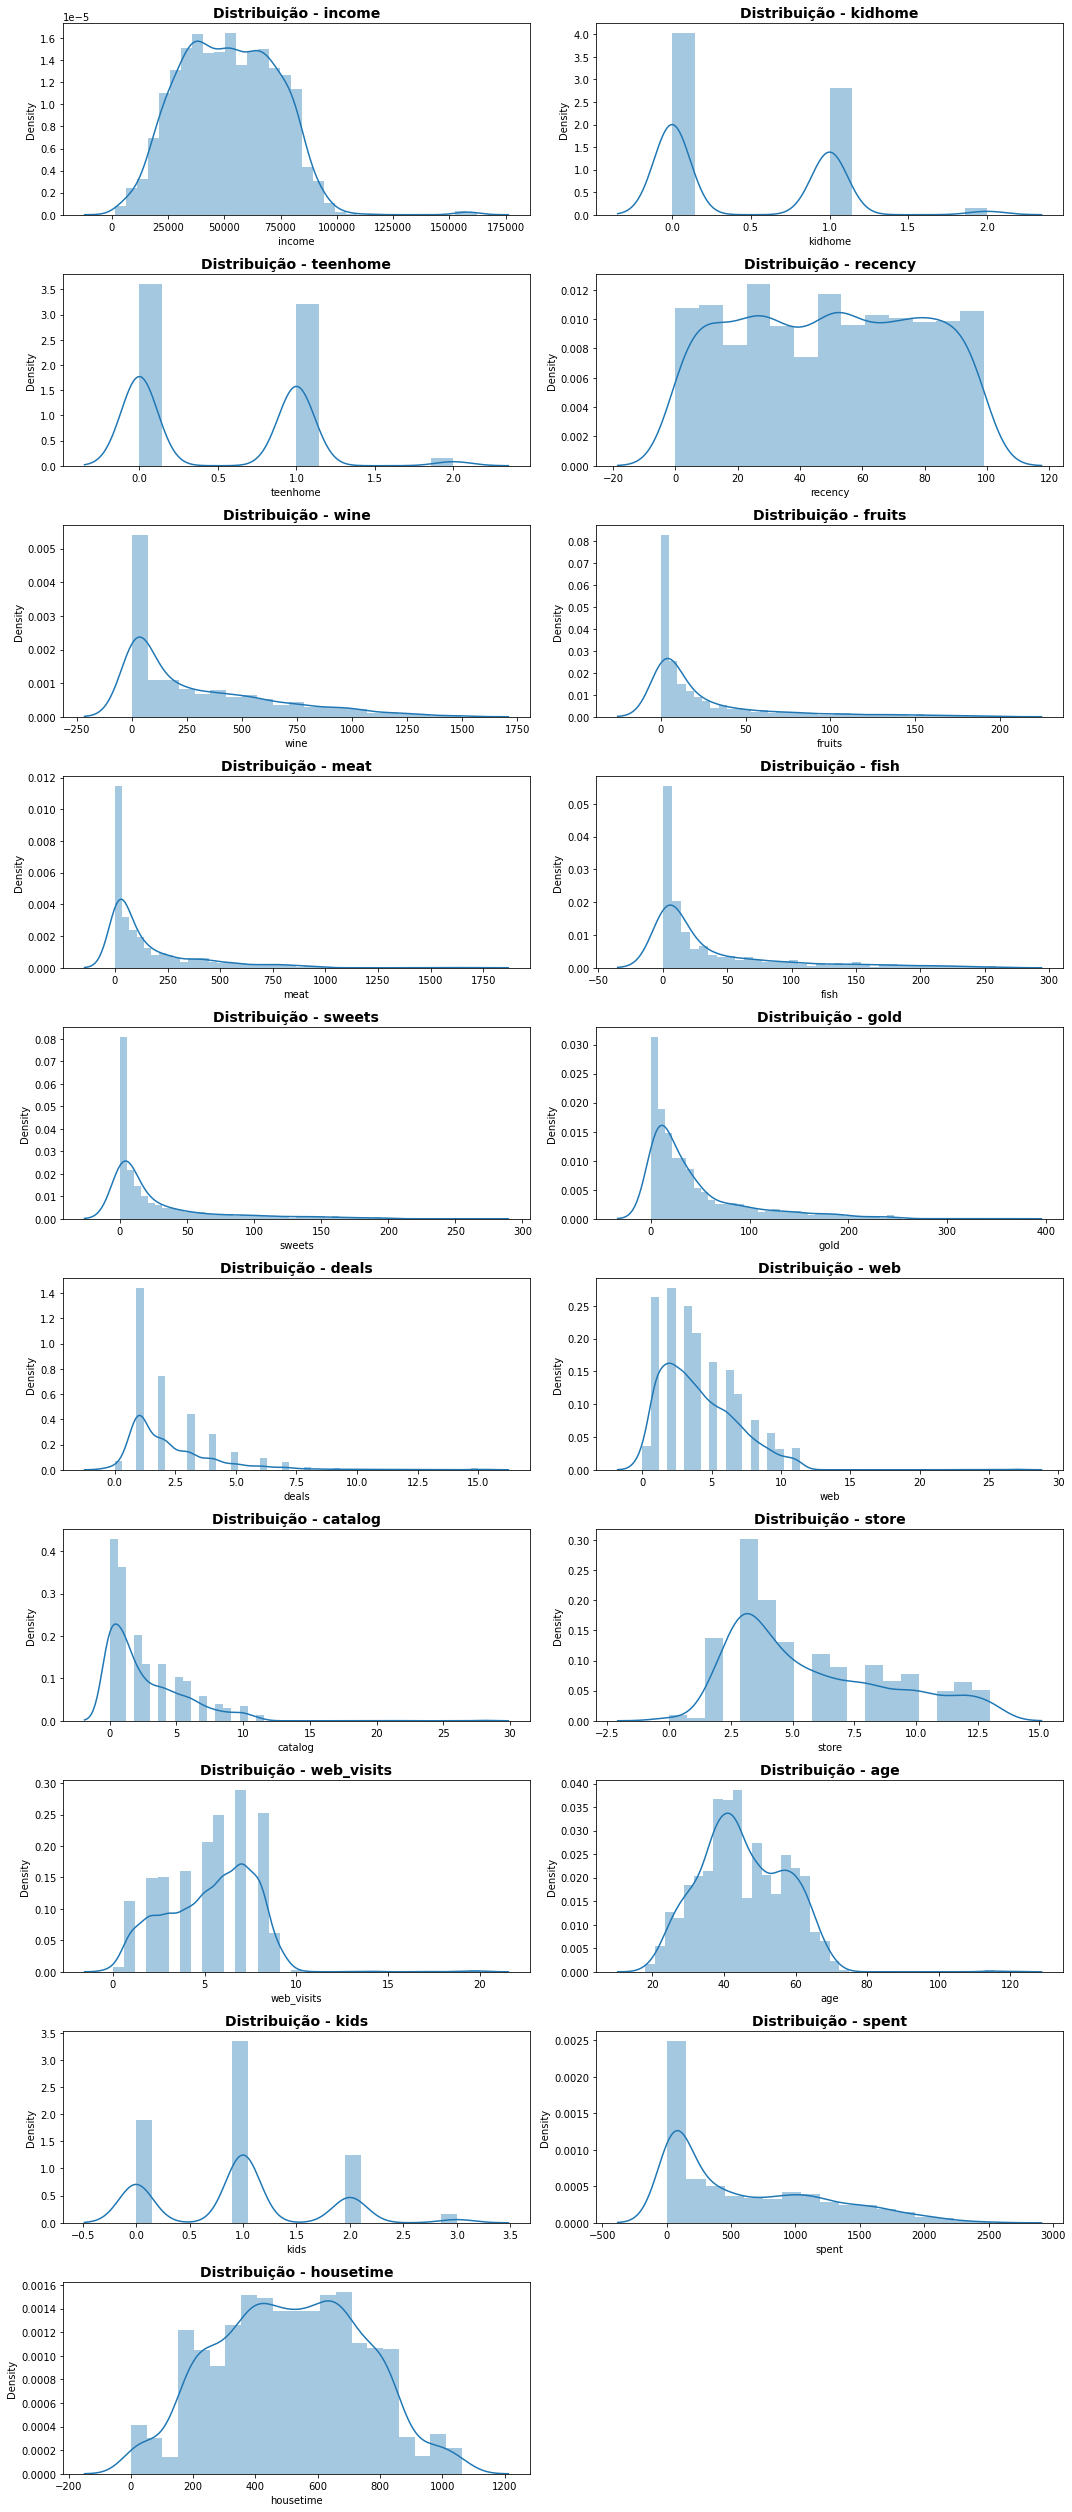

In [22]:
plt.figure(figsize = [15, 35])
for i in col_con:
    plt.subplot(10, 2, col_con.index(i) + 1)
    sns.distplot(df[i])
    plt.title("Distribuição - " + i, fontsize = 14, fontweight = "bold")
    plt.tight_layout()
    
plt.show()

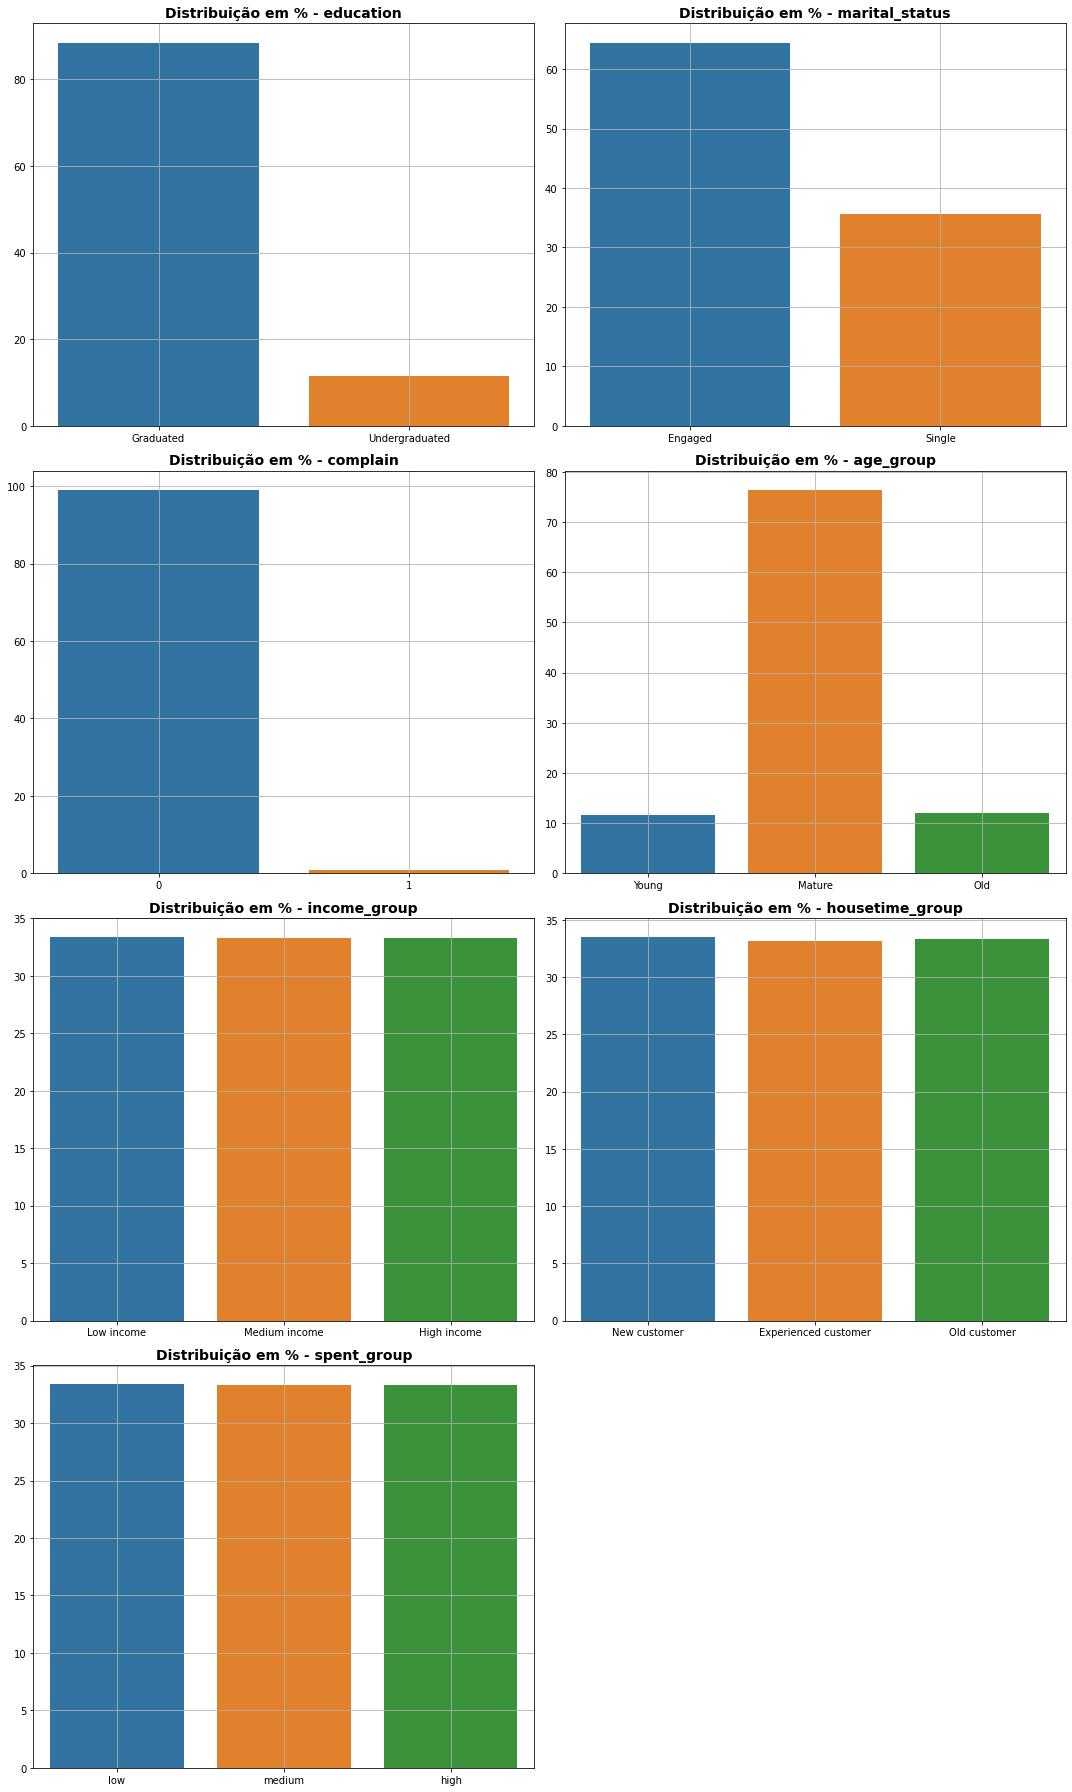

In [23]:
plt.figure(figsize = [15, 25])
for i in col_cat:
    plt.subplot(4, 2, col_cat.index(i) + 1)
    sns.barplot(x = df[i].value_counts().index, y = df[i].value_counts().values / df[i].shape[0] * 100)
    plt.title("Distribuição em % - " + i, fontsize = 14, fontweight = "bold")
    plt.grid()
    plt.tight_layout()
    
plt.show()

### Analisando os hábitos de consumo dos grupos criados:

### Agrupamento por poder aquisitivo:

In [24]:
df_income = df.groupby("income_group")[["wine", "fruits", "meat", "fish", "sweets", "gold", 'web', 'catalog', 'store', "spent"]].mean()
df_income

,wine,fruits,meat,fish,sweets,gold,web,catalog,store,spent
income_group,,,,,,,,,,
Low income,31.121821,5.991968,25.665328,9.057564,6.068273,17.730924,2.163320,0.530120,3.088353,95.635877
Medium income,266.162198,16.520107,90.450402,23.620643,16.738606,43.853887,4.616622,2.120643,5.912869,457.345845
High income,615.284182,56.438338,385.123324,79.975871,58.445040,70.558981,5.478552,5.340483,8.376676,1265.825737


- Produtos mais comprados em % por poder aquisitivo:

In [25]:
df_income_pct = df_income[["wine", "fruits", "meat", "fish", "sweets", "gold", "spent"]].copy()

for i in df_income_pct.columns.tolist():
    df_income_pct[i] = round(df_income_pct[i] / df_income_pct["spent"], 2) * 100
    
df_income_pct

,wine,fruits,meat,fish,sweets,gold,spent
income_group,,,,,,,
Low income,33.0,6.0,27.0,9.0,6.0,19.0,100.0
Medium income,58.0,4.0,20.0,5.0,4.0,10.0,100.0
High income,49.0,4.0,30.0,6.0,5.0,6.0,100.0


- Local de compra mais utilizado em % por poder aquisitivo:

In [26]:
df_income_pct2 = df.copy()
df_income_pct2["total_buys"] = df_income_pct2['web'] + df_income_pct2['catalog'] + df_income_pct2['store']
df_income_pct2 = df_income_pct2.groupby("income_group")[["web", "catalog", "store", "deals", "total_buys"]].mean().sort_values(by = "total_buys")
for i in df_income_pct2.columns.tolist():
    df_income_pct2[i] = round(df_income_pct2[i] / df_income_pct2["total_buys"], 2) * 100
df_income_pct2

,web,catalog,store,deals,total_buys
income_group,,,,,
Low income,37.0,9.0,53.0,37.0,100.0
Medium income,36.0,17.0,47.0,25.0,100.0
High income,29.0,28.0,44.0,9.0,100.0


###  Agrupamento por tempo como cliente:

In [27]:
df_housetime = df.groupby("housetime_group")[["wine", "fruits", "meat", "fish", "sweets", "gold", 'web', 'catalog', 'store', "spent"]].mean()
df_housetime

,wine,fruits,meat,fish,sweets,gold,web,catalog,store,spent
housetime_group,,,,,,,,,,
New customer,253.585333,23.857333,151.572000,33.262667,23.466667,33.988000,3.520000,2.394667,5.454667,519.732000
Experienced customer,293.098250,24.827725,161.913863,34.419919,26.503365,45.193809,4.049798,2.658143,5.675639,585.956931
Old customer,365.745308,30.245308,187.626005,44.943700,31.270777,52.985255,4.689008,2.936997,6.245308,712.816354


- Produtos mais comprados em % por tempo como cliente:

In [28]:
df_housetime_pct = df_housetime[["wine", "fruits", "meat", "fish", "sweets", "gold", "spent"]].copy()

for i in df_housetime_pct.columns.tolist():
    df_housetime_pct[i] = round(df_housetime_pct[i] / df_housetime_pct["spent"], 2) * 100
    
df_housetime_pct

,wine,fruits,meat,fish,sweets,gold,spent
housetime_group,,,,,,,
New customer,49.0,5.0,29.0,6.0,5.0,7.0,100.0
Experienced customer,50.0,4.0,28.0,6.0,5.0,8.0,100.0
Old customer,51.0,4.0,26.0,6.0,4.0,7.0,100.0


- Local de compra mais utilizado em % por tempo como cliente:

In [29]:
df_housetime_pct2 = df.copy()
df_housetime_pct2["total_buys"] = df_housetime_pct2['web'] + df_housetime_pct2['catalog'] + df_housetime_pct2['store']
df_housetime_pct2 = df_housetime_pct2.groupby("housetime_group")[["web", "catalog", "store", "deals", "total_buys"]].mean().sort_values(by = "total_buys")
for i in df_housetime_pct2.columns.tolist():
    df_housetime_pct2[i] = round(df_housetime_pct2[i] / df_housetime_pct2["total_buys"], 2) * 100
df_housetime_pct2

,web,catalog,store,deals,total_buys
housetime_group,,,,,
New customer,31.0,21.0,48.0,17.0,100.0
Experienced customer,33.0,21.0,46.0,18.0,100.0
Old customer,34.0,21.0,45.0,20.0,100.0


### Agrupamento por total gasto:

In [30]:
df_spent = df.groupby("spent_group")[["wine", "fruits", "meat", "fish", "sweets", "gold", 'web', 'catalog', 'store', "spent"]].mean()
df_spent

,wine,fruits,meat,fish,sweets,gold,web,catalog,store,spent
spent_group,,,,,,,,,,
low,17.954485,3.228916,12.057564,4.738956,3.349398,9.875502,1.583668,0.287818,2.824632,51.204819
medium,221.950402,17.469169,87.273458,24.587131,18.034853,44.222520,5.029491,2.050938,5.974531,413.537534
high,672.680965,58.256032,401.926273,83.333780,59.871314,78.056300,5.646113,5.652815,8.579088,1354.124665


- Produtos mais comprados em % por total gasto:

In [31]:
df_spent_pct = df_spent[["wine", "fruits", "meat", "fish", "sweets", "gold", "spent"]].copy()

for i in df_spent_pct.columns.tolist():
    df_spent_pct[i] = round(df_spent_pct[i] / df_spent_pct["spent"], 2) * 100
    
df_spent_pct

,wine,fruits,meat,fish,sweets,gold,spent
spent_group,,,,,,,
low,35.0,6.0,24.0,9.0,7.0,19.0,100.0
medium,54.0,4.0,21.0,6.0,4.0,11.0,100.0
high,50.0,4.0,30.0,6.0,4.0,6.0,100.0


- Local de compra mais utilizado em % por tempo como cliente:

In [32]:
df_spent_pct2 = df.copy()
df_spent_pct2["total_buys"] = df_spent_pct2['web'] + df_spent_pct2['catalog'] + df_spent_pct2['store']
df_spent_pct2 = df_spent_pct2.groupby("spent_group")[["web", "catalog", "store", "deals", "total_buys"]].mean().sort_values(by = "total_buys")
for i in df_spent_pct2.columns.tolist():
    df_spent_pct2[i] = round(df_spent_pct2[i] / df_spent_pct2["total_buys"], 2) * 100
df_spent_pct2

,web,catalog,store,deals,total_buys
spent_group,,,,,
low,34.0,6.0,60.0,38.0,100.0
medium,39.0,16.0,46.0,25.0,100.0
high,28.0,28.0,43.0,10.0,100.0


## Clusterização

### Por tipo de cliente

#### Pré-Processamento

In [33]:
df2 = df.copy()

In [34]:
df2 = pd.get_dummies(df2, drop_first = True)

In [35]:
ss_scaler = StandardScaler()

for i in df2.columns:
    df2[i] = ss_scaler.fit_transform(df2[i].values.reshape(-1, 1))

#### Redução de dimensionalidade para as variáveis que queremos agrupar

In [36]:
df_temp = df2[['income', 'recency', 'spent', 'housetime']]

#### Aplicando o algorítimo

Primeiro, vamos aplicar a curva de elbow para podermos ter uma noção do número de cluster ideal:

In [37]:
X_ = df_temp.values

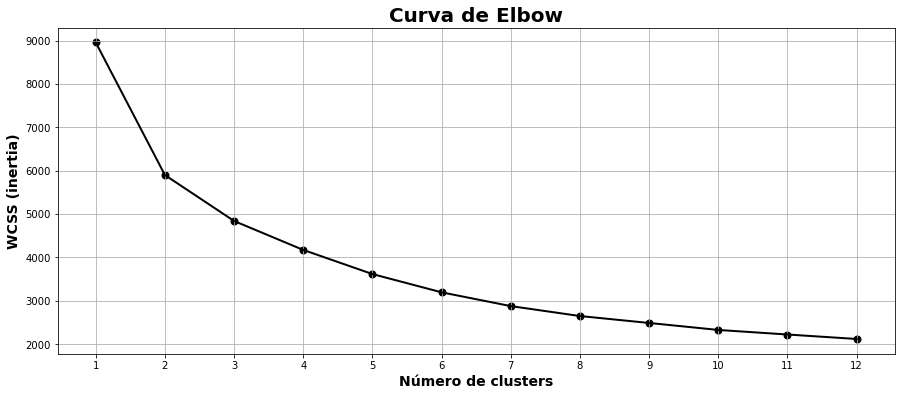

In [38]:
lista_inertias = []
for i in range(1, 13):
    km = KMeans(n_clusters=i, random_state = 42)
    km.fit(X_)
    lista_inertias.append(km.inertia_)

plt.figure(figsize=[15,6])
plt.title("Curva de Elbow", fontsize = 20, fontweight = 'bold')
plt.xlabel("Número de clusters", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS (inertia)", fontsize = 14, fontweight = 'bold')
plt.plot(range(1, 1+len(lista_inertias)), lista_inertias, c = 'black', lw = 2)
plt.scatter(range(1, 1+len(lista_inertias)), lista_inertias, c = 'black', lw = 2)
plt.xticks(range(1,1+len(lista_inertias)))
plt.grid()
plt.show()

4 clusters parece um bom número.

In [39]:
km = KMeans(n_clusters = 4, random_state = 42).fit(X_)

labels_valiosos = km.predict(X_)

**Vamos adicionar a coluna referente aos clientes valiososos em nosso dataset principal.**

In [40]:
df["client_type"] = labels_valiosos

#### Análise dos clusters

In [41]:
df.groupby("client_type")['income', 'recency', 'spent', 'housetime'].mean().sort_values(by = "spent")

,income,recency,spent,housetime
client_type,,,,
0,38168.626530,74.307229,177.816265,491.200301
1,37989.787123,22.721139,195.979010,505.098951
3,74754.502337,45.745921,1150.431235,316.321678
2,70176.074118,53.991649,1283.096033,725.572025


Com base nas informações que possuimos acima, vamos renomear nossos clusters da seguinte maneira:

Grupo 0: "need_atention" (Precisam de atenção)

Grupo 1: "basic_clients" (Clientes mais simples)

Grupo 2: "best_clients"  (Melhores Clientes)

Grupo 3: "potential_clients" (Clientes com potêncial)

In [42]:
df["client_type"] = df["client_type"].replace({0:"need_atention", 1: "basic_clients", 2: "best_clients", 3: "potential_clients"})

###  Análise - hábitos de consumo dos clusters criados

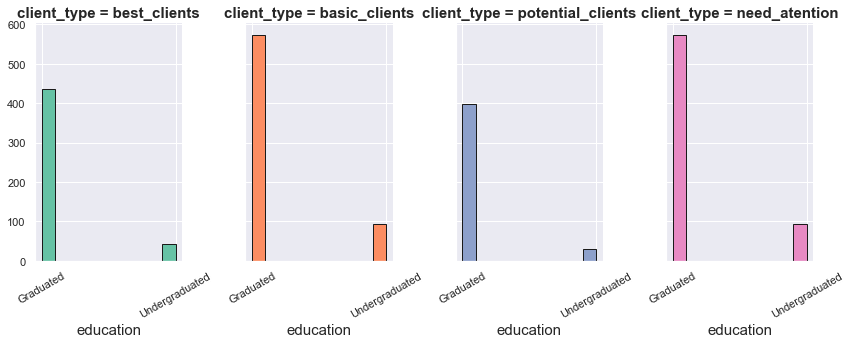

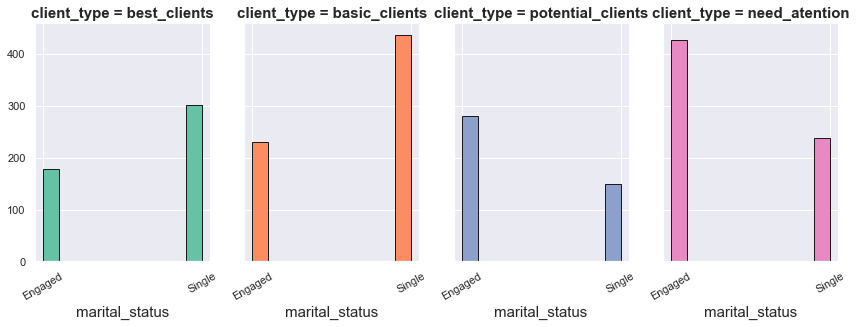

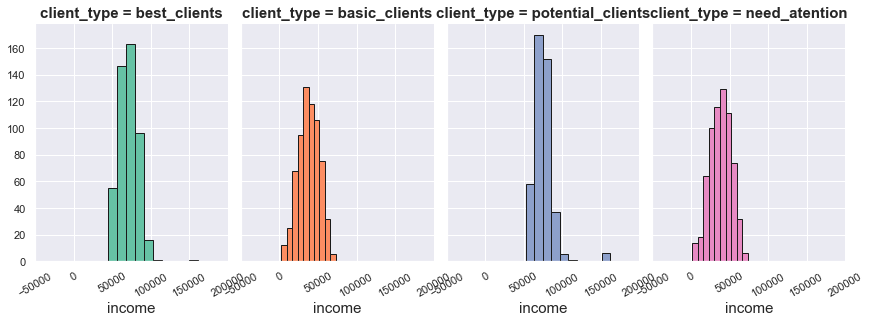

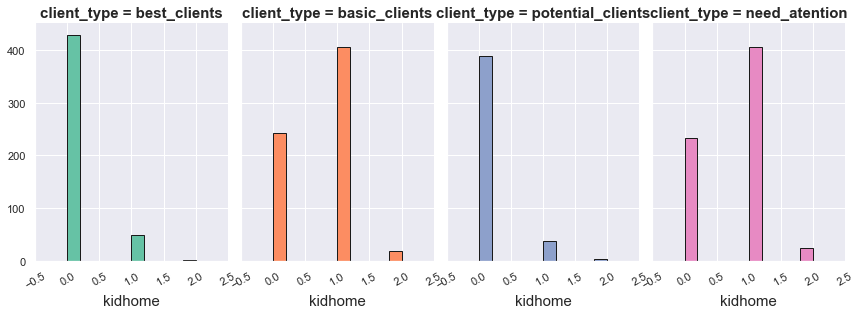

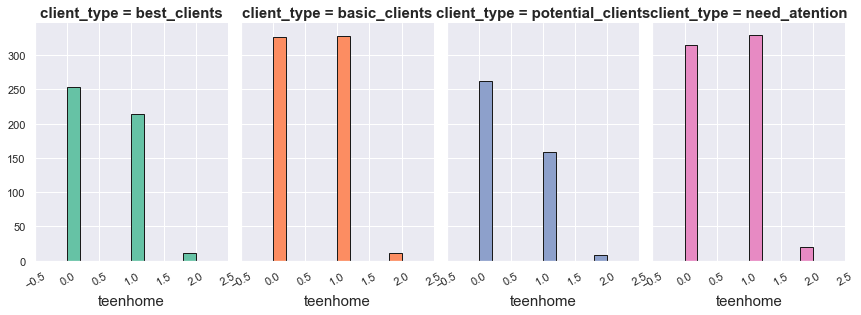

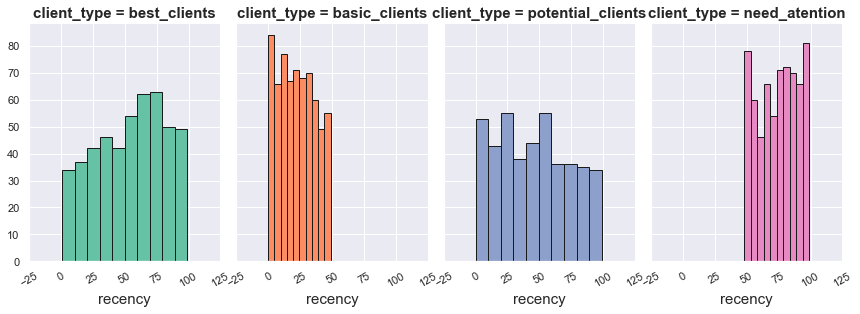

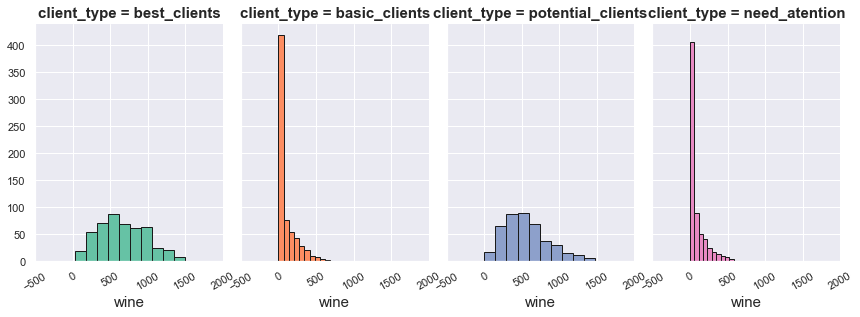

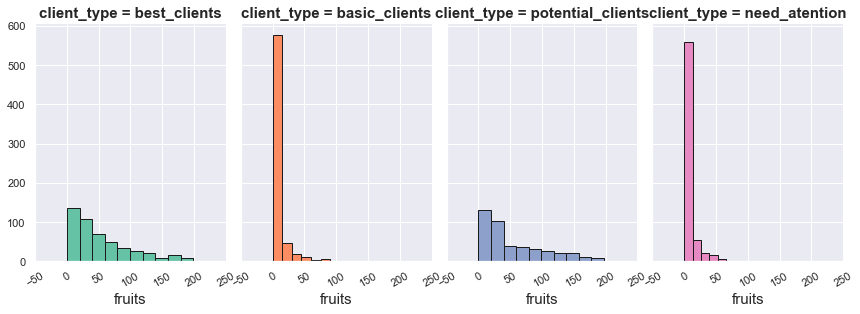

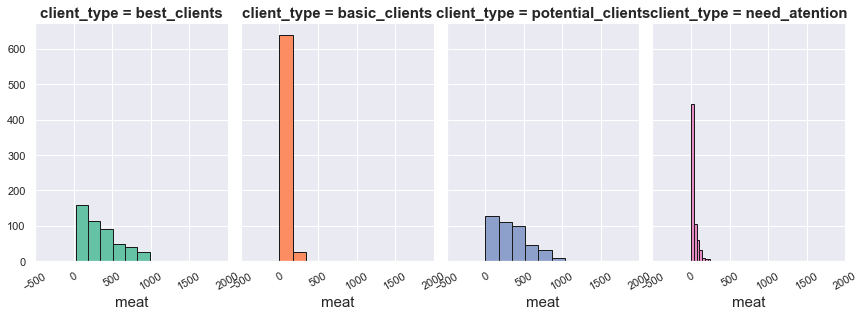

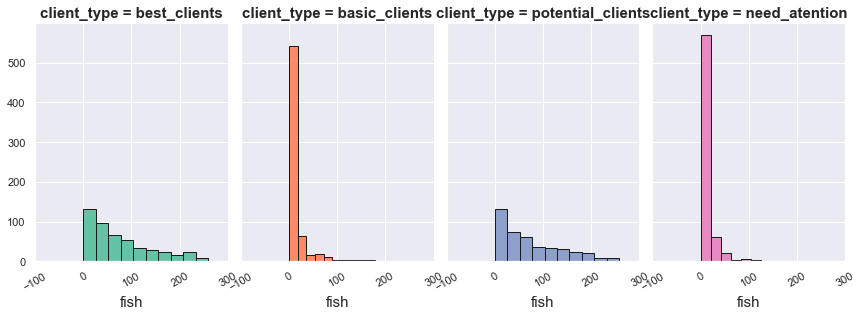

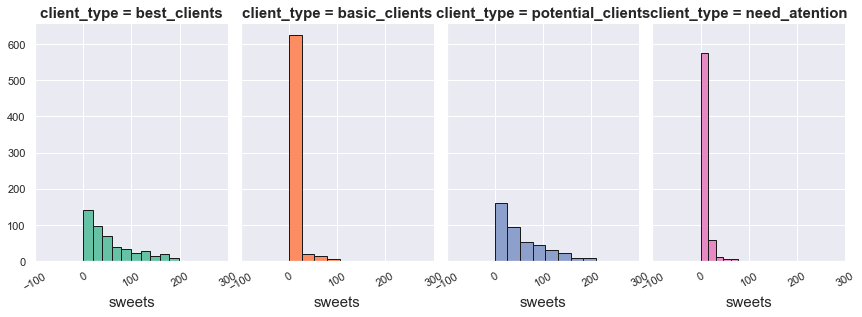

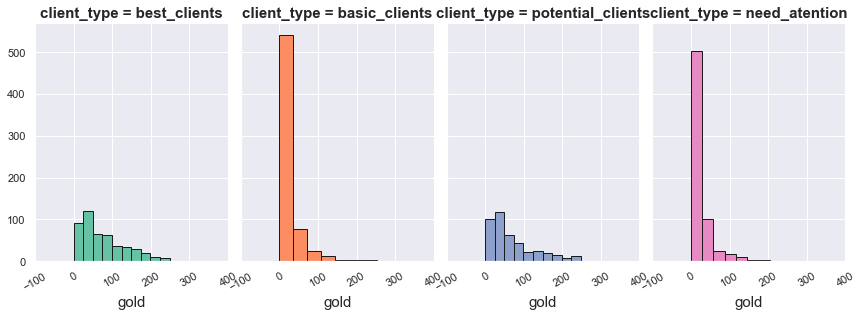

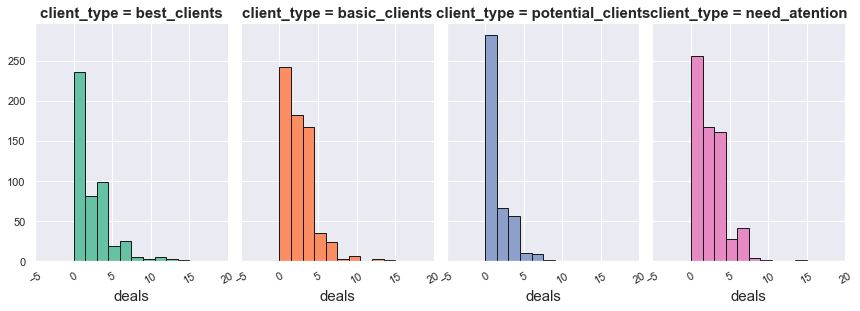

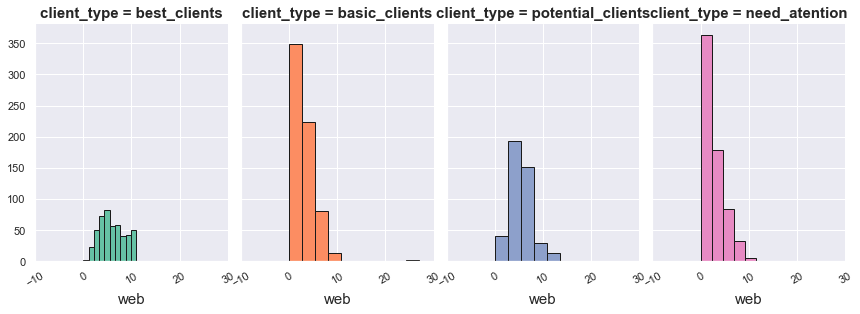

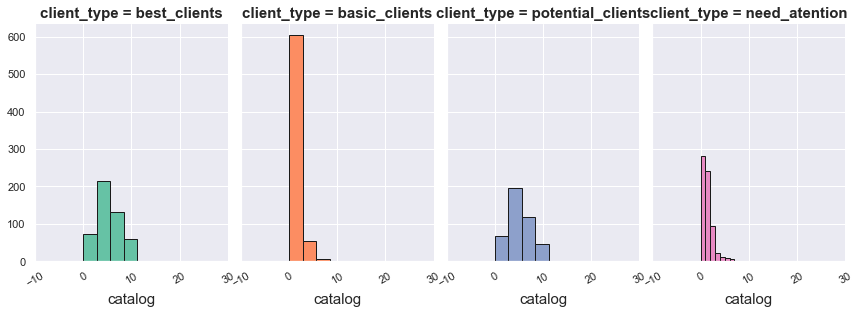

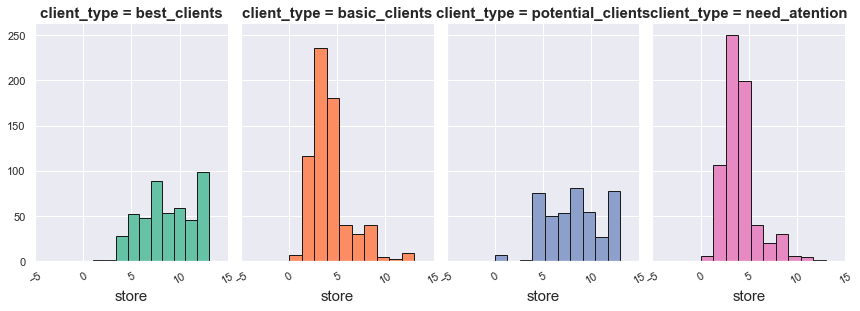

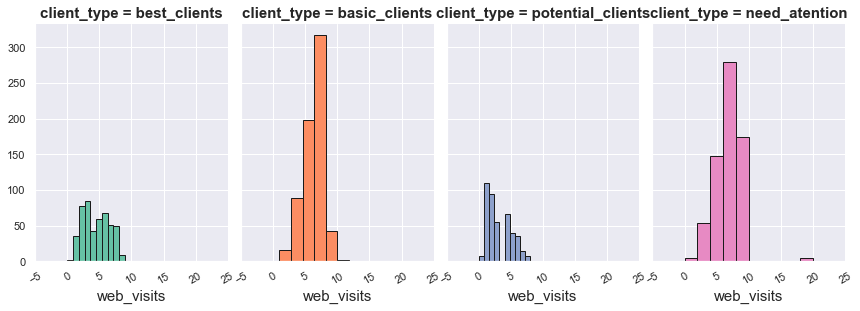

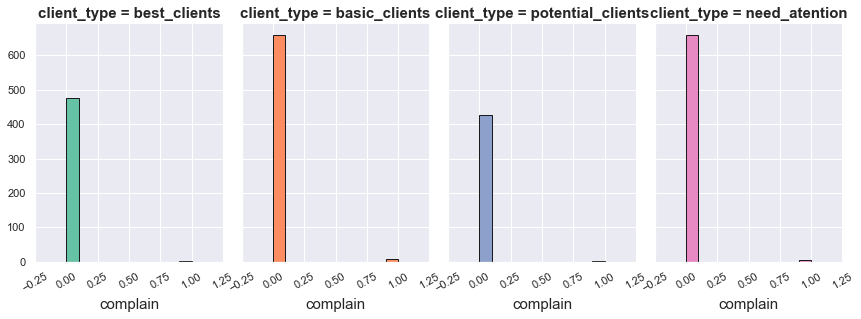

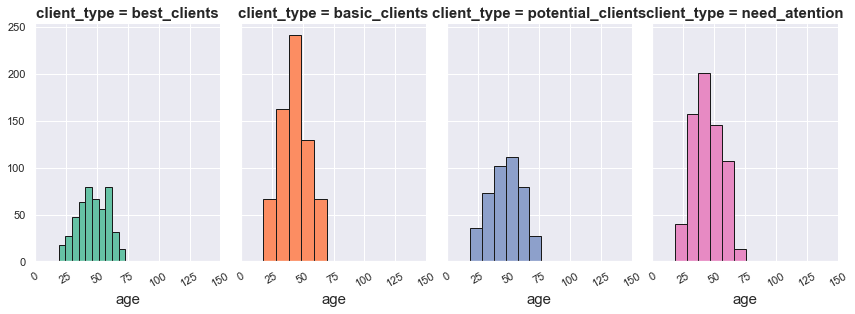

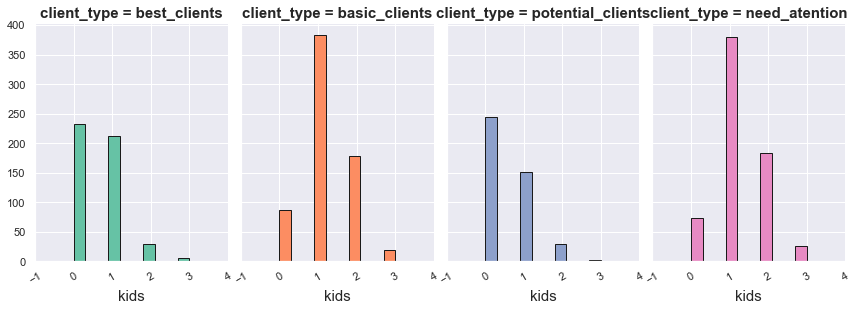

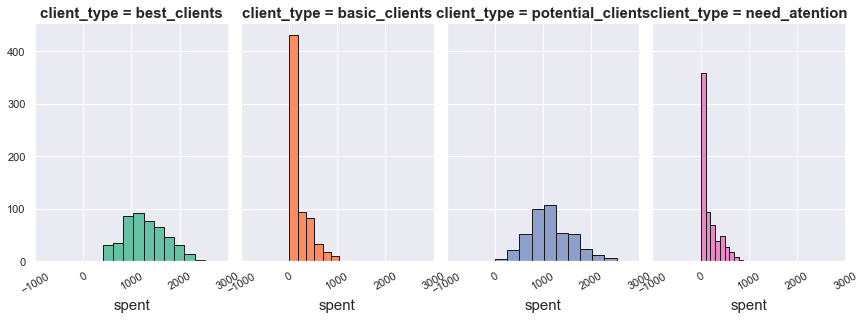

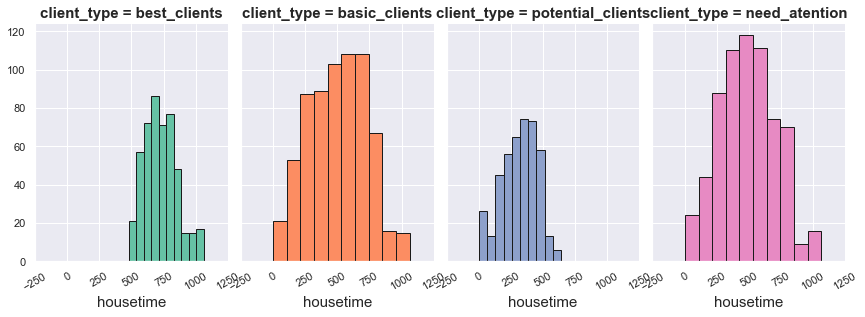

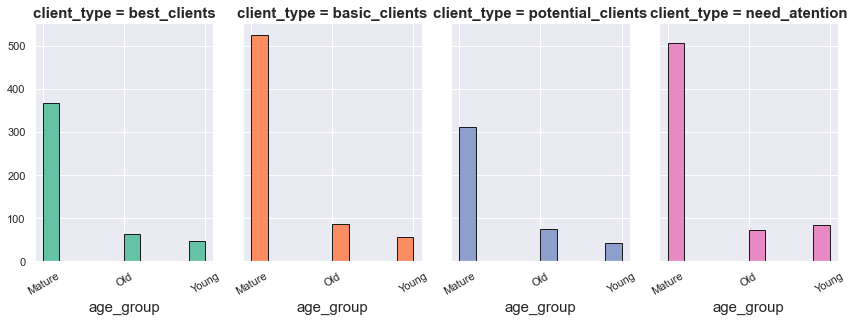

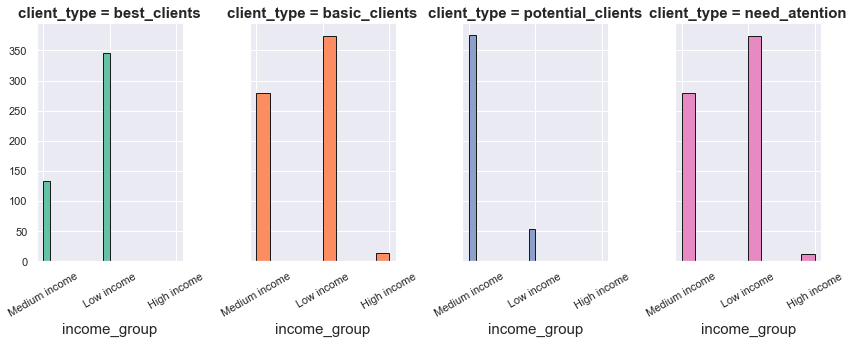

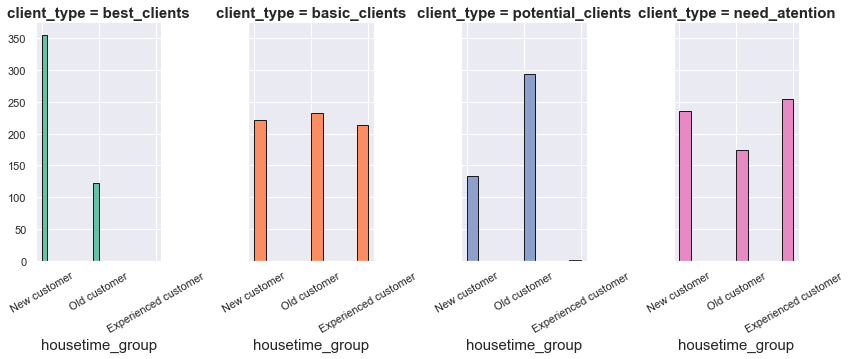

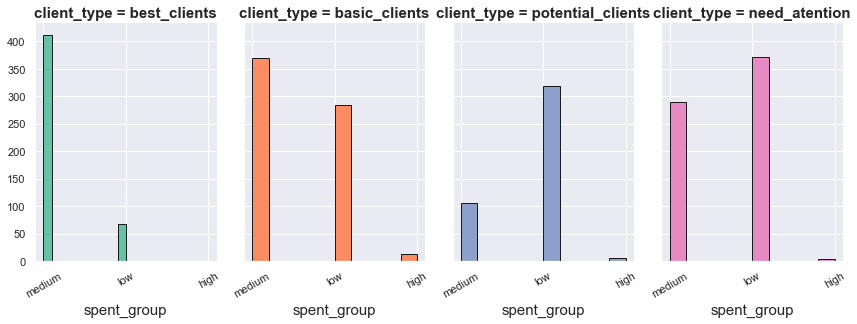

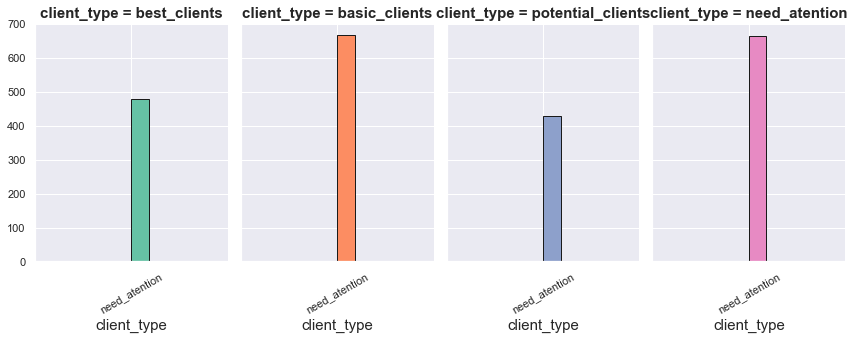

In [43]:
sns.set()

for i in df:
    g = sns.FacetGrid(df, col = "client_type", hue = "client_type", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30)
    g.set_xlabels(size=15)
    g.set_titles(size=15, fontweight="bold")
    g.fig.set_figheight(5)

In [44]:
df_habitos = df.groupby("client_type")[["wine", "fruits", "meat", "fish", "sweets", "gold", "spent"]].mean().sort_values(by = "spent")
df_habitos

,wine,fruits,meat,fish,sweets,gold,spent
client_type,,,,,,,
need_atention,88.328313,7.981928,38.980422,10.957831,8.194277,23.373494,177.816265
basic_clients,97.274363,8.190405,43.727136,13.119940,8.482759,25.184408,195.979010
potential_clients,557.547786,53.876457,342.860140,73.573427,53.792541,68.780886,1150.431235
best_clients,664.064718,52.248434,358.693111,76.114823,55.206681,76.768267,1283.096033


In [45]:
df_habitos_pct = df_habitos.copy()

for i in df_habitos_pct.columns.tolist():
    df_habitos_pct[i] = round(df_habitos_pct[i] / df_habitos_pct["spent"], 2) * 100
    
df_habitos_pct

,wine,fruits,meat,fish,sweets,gold,spent
client_type,,,,,,,
need_atention,50.0,4.0,22.0,6.0,5.0,13.0,100.0
basic_clients,50.0,4.0,22.0,7.0,4.0,13.0,100.0
potential_clients,48.0,5.0,30.0,6.0,5.0,6.0,100.0
best_clients,52.0,4.0,28.0,6.0,4.0,6.0,100.0


In [46]:
df_habitos_pct.corr().round(2)

,wine,fruits,meat,fish,sweets,gold,spent
wine,1.00,-0.82,-0.20,0.00,-0.71,0.00,NaN
fruits,-0.82,1.00,0.73,-0.33,0.58,-0.58,NaN
meat,-0.20,0.73,1.00,-0.57,0.14,-0.98,NaN
fish,0.00,-0.33,-0.57,1.00,-0.58,0.58,NaN
sweets,-0.71,0.58,0.14,-0.58,1.00,0.00,NaN
gold,0.00,-0.58,-0.98,0.58,0.00,1.00,NaN
spent,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_habitos2 = df.copy()
df_habitos2["total_buys"] = df_habitos2['web'] + df_habitos2['catalog'] + df_habitos2['store']
df_habitos2 = df_habitos2.groupby("client_type")[["web", "catalog", "store", "deals", "total_buys"]].mean().sort_values(by = "total_buys")
for i in df_habitos2.columns.tolist():
    df_habitos2[i] = round(df_habitos2[i] / df_habitos2["total_buys"], 2) * 100
df_habitos2

,web,catalog,store,deals,total_buys
client_type,,,,,
need_atention,37.0,12.0,51.0,32.0,100.0
basic_clients,38.0,13.0,50.0,31.0,100.0
potential_clients,29.0,27.0,44.0,9.0,100.0
best_clients,30.0,26.0,44.0,12.0,100.0


    Com as informações acima a respeito dos clusters, podemos gerar alguns insights para atigir algumas metas:

    - Para trazer os clientes do grupo "need_atention" de volta a compras, podemos focar em promoções por compras na loja ou pela internet, visto que este grupo tende a aceitar mais promoções, e compras pela loja e internet são os meios de compras mais comuns nesse grupo.
    - Podemos usar da mesma idéia para manter ou aumentar as vendas do grupo de "basic_clients", visto que as caracteristicas do grupo em relação ao local da venda e também aos produtos mais comprados são muito semelhantes.
    - Visto que os cliente em potencial e os melhores clientes compram bastante por catálogo, podemos utilizar desse meio para conquistar de vez os clientes em potencial além de aumentar as vendas dos clientes mais fiéis.
    - Vemos que por algum motivo, quem compra frutas tende a comprar carnes também, desta maneira podemos pensar em um jeito de fazer uma compra alavancada.

## Resumo

Após a análise exploratória e a clusterização feita, podemos enfim listar as observações relevantes e alguns insights tirados dos dados.

### Informações sobre os clientes em geral:
    
- Média de ganho: Entre 30.600 e 73.400 (Em dólares por ano).
- Ultima compra: Entre 20 e 78 dias.
- Idade média: Entre 33 e 57 anos.
- Média de filhos: 1.
- Média de gasto: \$600.00
- Média de tempo como cliente: Entre 280 e 744 dias.
- A maioria massante é de pessoas graduadas.
- Mais da metade dos clientes esta em um relacionamento.
- A maior parte dos clientes tem entre 30 e 60 anos.

### Hábitos de consumo dos grupos criados

**Grupo 1 - Poder aquisitivo**

Habitos de consumo dos grupos por poder aquisitivo:
    
    - Baixo:
        Vinho: 33%
        Frutas: 6%
        Carne: 27%
        Frutos do mar: 9%
        Doces: 6%
        Ouro: 19%
        
        Compras pela internet: 37%
        Compras pelo catálogo: 9%
        Compras na loja: 53%
        Compras com desconto: 37%
        
     - Médio:
        Vinho: 58%
        Frutas: 4%
        Carne: 20%
        Frutos do mar: 5%
        Doces: 4%
        Ouro: 10%
        
        Compras pela internet: 36%
        Compras pelo catálogo: 17%
        Compras na loja: 47%
        Compras com desconto: 25%
        
     - Alto:
        Vinho: 49%
        Frutas: 4%
        Carne: 30%
        Frutos do mar: 6%
        Doces: 5%
        Ouro: 6%
        
        Compras pela internet: 29%
        Compras pelo catálogo: 28%
        Compras na loja: 44%
        Compras com desconto: 9%
        
**Grupo 2 - Tempo como cliente**

Habitos de consumo dos grupos por tempo como cliente:
    
    - Clientes novos:
        Vinho: 49%
        Frutas: 5%
        Carne: 29%
        Frutos do mar: 6%
        Doces: 5%
        Ouro: 7%
        
        Compras pela internet: 31%
        Compras pelo catálogo: 21%
        Compras na loja: 48%
        Compras com desconto: 17%
        
     - Clientes frequentes:
        Vinho: 50%
        Frutas: 4%
        Carne: 28%
        Frutos do mar: 6%
        Doces: 5%
        Ouro: 8%
        
        Compras pela internet: 33%
        Compras pelo catálogo: 21%
        Compras na loja: 46%
        Compras com desconto: 18%
        
     - Clientes experientes:
        Vinho: 51%
        Frutas: 4%
        Carne: 26%
        Frutos do mar: 6%
        Doces: 4%
        Ouro: 7%
        
        Compras pela internet: 34%
        Compras pelo catálogo: 21%
        Compras na loja: 45%
        Compras com desconto: 20%
        
**Grupo 3 - Total gasto**

Habitos de consumo dos grupos por gasto:
    
    - Clientes que gastam pouco:
        Vinho: 35%
        Frutas: 6%
        Carne: 24%
        Frutos do mar: 9%
        Doces: 7%
        Ouro: 19%
        
        Compras pela internet: 34%
        Compras pelo catálogo: 6%
        Compras na loja: 60%
        Compras com desconto: 38%
        
     - Clientes que gastam um valor médio:
        Vinho: 54%
        Frutas: 4%
        Carne: 21%
        Frutos do mar: 6%
        Doces: 4%
        Ouro: 11%
        
        Compras pela internet: 39%	
        Compras pelo catálogo: 16%
        Compras na loja: 46%
        Compras com desconto: 25%
        
     - Clientes que gastam muito:
        Vinho: 50%
        Frutas: 4%
        Carne: 30%
        Frutos do mar: 6%
        Doces: 4%
        Ouro: 6%
        
        Compras pela internet: 28%
        Compras pelo catálogo: 28%
        Compras na loja: 43%
        Compras com desconto: 10%

### Clusters

Pelo observado podemos separar os nossos clusters da seguinte maneira:

**Precisam de atenção:** Base de clientes simples mas que não compram há muito tempo, clientes que precisam de atenção!

- Tempo como cliente: A um tempo médio.
- Gasto: Baixo.
- Ultima compra: Há bastante tempo.
- Poder aquisitivo: Baixo.

**Clientes mais simples:**  Clientes mais simples e fieis, clientes base que precisam apenas serem mantidos!
    
- Tempo como cliente: A um tempo médio.
- Gasto: Baixo.
- Ultima compra: Recentemente.
- Poder aquisitivo: Baixo.

**Melhores Clientes:** Melhores clientes, mas não compram a um tempo, clientes importantes que precisam ser mantidos e tragos de volta!

- Tempo como cliente: A bastante tempo.
- Gasto: Alto.
- Ultima compra: Há bastante tempo.
- Poder aquisitivo: Alto.

**Clientes com potêncial:** Potenciais futuros grandes clientes, possuem as mesmas caracteristicas dos melhores clientes, mas são recentes.

- Tempo como cliente: Recente.
- Gasto: Alto.
- Ultima compra: Recente.
- Poder aquisitivo: Alto.

**Alguns insights:**

Com as informações acima a respeito dos clusters, podemos gerar alguns insights para atigir algumas metas:

    - Para trazer os clientes do grupo "need_atention" de volta a compras, podemos focar em promoções por compras na loja ou pela internet, visto que este grupo tende a aceitar mais promoções, e compras pela loja e internet são os meios de compras mais comuns nesse grupo.
    
    - Podemos usar da mesma idéia para manter ou aumentar as vendas do grupo de "basic_clients", visto que as caracteristicas do grupo em relação ao local da venda e também aos produtos mais comprados são muito semelhantes.
    
    - Visto que os cliente em potencial e os melhores clientes compram bastante por catálogo, podemos utilizar desse meio para conquistar de vez os clientes em potencial além de aumentar as vendas dos clientes mais fiéis.
    
    - Vemos que por algum motivo, quem compra frutas tende a comprar carnes também, desta maneira podemos pensar em um jeito de fazer uma compra alavancada.

## Conclusão

Após toda nossa análise a respeitos dos clientes em geral, e as subdivisões criadas, extraímos algumas informações muito úteis a respeito dos nossos clientes e seus hábitos, podendo assim junto com o time de negócios ou de markenting da empresa buscar soluções e melhorias, assim como as sugeridas.

Lembrando que a análise e divisão dos dados é tão profunda quanto podemos querer, desta forma cabe ao time em conjunto decidir a melhor maneira de dividir e analisar os dados pensando no problema em questão ou em questão as melhorias buscadas.
